<AxesSubplot:title={'center':'한글'}>

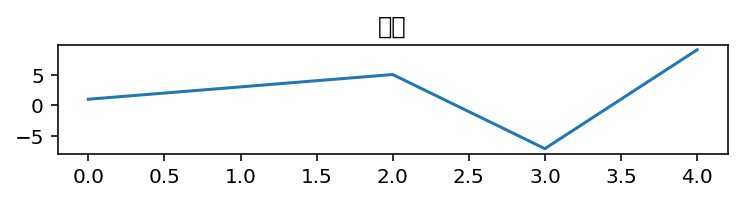

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = "retina"

pd.Series([1, 3, 5, -7, 9]).plot(title = "한글", figsize = (6, 1))

In [6]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
         "지하철 운행시간과 지하철 요금 문의입니다.",
         "지하철 승강장 문의입니다.",
         "택시 승강장 문의입니다."]

corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '택시 승강장 문의입니다.']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# fit() : 문서에 있는 모든 토큰의 단어사전을 학습
# transform() : 문서를 단어와 문서 행렬로 변환. transform() 이후에는 행렬로 변환되어 숫자 형태로 변경
# fit_transform() : 학습과 변환을 한번에 한다. fit_transform()은 학습 데이터에서만 사용 가능, 테스트 데이터에서 사용 불가

In [8]:
cvect = CountVectorizer()
cvect.fit(corpus)
dtm = cvect.transform(corpus)
dtm

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [9]:
dtm = cvect.fit_transform(corpus)
dtm

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [11]:
cvect.vocabulary_

{'코로나': 7,
 '거리두기와': 0,
 '상생지원금': 2,
 '문의입니다': 1,
 '지하철': 6,
 '운행시간과': 5,
 '요금': 4,
 '승강장': 3,
 '택시': 8}

In [15]:
# get_feature_names_out => get_feature_names
# 단어-문서 행렬에 등장하는 순서대로 단어 사전을 반환한다.
vocab = cvect.get_feature_names()
vocab

['거리두기와', '문의입니다', '상생지원금', '승강장', '요금', '운행시간과', '지하철', '코로나', '택시']

In [16]:
df_dtm = pd.DataFrame(dtm.toarray(), columns = vocab)
df_dtm

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,1,1,1,0,0,0,0,2,0
1,0,1,0,0,1,1,2,0,0
2,0,1,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1


In [18]:
dtm.toarray()

array([[1, 1, 1, 0, 0, 0, 0, 2, 0],
       [0, 1, 0, 0, 1, 1, 2, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1]], dtype=int64)

In [21]:
df_dtm.sum()

거리두기와    1
문의입니다    4
상생지원금    1
승강장      2
요금       1
운행시간과    1
지하철      3
코로나      2
택시       1
dtype: int64

In [22]:
df_dtm.sum().to_frame()

,0
거리두기와,1
문의입니다,4
상생지원금,1
승강장,2
요금,1
운행시간과,1
지하철,3
코로나,2
택시,1


In [23]:
df_dtm.sum().to_frame().T

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,1,4,1,2,1,1,3,2,1


In [24]:
cvect = CountVectorizer(ngram_range = (1, 2))
dtm = cvect.fit_transform(corpus)

In [25]:
dtm

<4x20 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>

In [28]:
vocab = cvect.get_feature_names()
df_dtm = pd.DataFrame(dtm.toarray(), columns = vocab)
df_dtm

,거리두기와,거리두기와 코로나,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,운행시간과,운행시간과 지하철,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기와,코로나 상생지원금,택시,택시 승강장
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0
1,0,0,1,0,0,0,0,1,1,1,1,2,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1


In [30]:
type(vocab)

list

In [32]:
type(dtm.toarray())

numpy.ndarray

In [33]:
df_dtm.sum().to_frame().T

,거리두기와,거리두기와 코로나,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,운행시간과,운행시간과 지하철,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기와,코로나 상생지원금,택시,택시 승강장
0,1,1,4,1,1,2,2,1,1,1,1,3,1,1,1,2,1,1,1,1


In [35]:
# min_df, max_df 설정
# min_df : 2 => 한번 등장하는 단어 제외
# max_df : 100 => 101번 이상 등장하는 단어 제외
# 값이 실수 => 0.9는 90%와 같다.
cvect = CountVectorizer(ngram_range = (1, 3), min_df = 0.2, max_df = 5)
dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names()
df_dtm = pd.DataFrame(dtm.toarray(), columns = vocab)
df_dtm

,거리두기와,거리두기와 코로나,거리두기와 코로나 상생지원금,문의입니다,상생지원금,상생지원금 문의입니다,승강장,승강장 문의입니다,요금,요금 문의입니다,...,지하철 운행시간과,지하철 운행시간과 지하철,코로나,코로나 거리두기와,코로나 거리두기와 코로나,코로나 상생지원금,코로나 상생지원금 문의입니다,택시,택시 승강장,택시 승강장 문의입니다
0,1,1,1,1,1,1,0,0,0,0,...,0,0,2,1,1,1,1,0,0,0
1,0,0,0,1,0,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,1


In [36]:
# max_features : 학습 단어 개수 제한
# 이 인자에 해당하는 수의 단어만큼만 학습한다.
cvect = CountVectorizer(ngram_range = (1, 3), min_df = 1, max_df = 1.0, max_features = 10)
dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names()
df_dtm = pd.DataFrame(dtm.toarray(), columns = vocab)
df_dtm

,문의입니다,승강장,승강장 문의입니다,지하철,코로나,코로나 거리두기와,코로나 거리두기와 코로나,코로나 상생지원금,코로나 상생지원금 문의입니다,택시
0,1,0,0,0,2,1,1,1,1,0
1,1,0,0,2,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1


In [37]:
# stop_words : 불용어 제거
stop_words = ["코로나", "문의입니다"]

cvect = CountVectorizer(ngram_range = (1, 3), min_df = 1, max_df = 1.0, max_features = 20, stop_words = stop_words)
dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names()
df_dtm = pd.DataFrame(dtm.toarray(), columns = vocab)
df_dtm

,거리두기와,거리두기와 상생지원금,상생지원금,승강장,요금,운행시간과,운행시간과 지하철,운행시간과 지하철 요금,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,지하철 운행시간과 지하철,택시,택시 승강장
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,2,0,1,1,1,0,0
2,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1


In [38]:
# analyzer : 문자, 단어 단위 설정
# 디폴트는 "word"이고 "char"이라고 설정하면 문자 단위로 끊을 수 있다.

cvect = CountVectorizer(analyzer = "char",
                        ngram_range = (1, 5), min_df = 2,
                        max_df = 1.0, max_features = 30,
                        stop_words = stop_words)

dtm = cvect.fit_transform(corpus)
vocab = cvect.get_feature_names()
df_dtm = pd.DataFrame(dtm.toarray(), columns = vocab)
df_dtm

,,문,문의,문의입,문의입니,.,니,니다,니다.,다,...,의입니다.,입,입니,입니다,입니다.,지,철,철,하,하철
0,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
1,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,2,2,2,2,2
2,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,0


* TfidfVectorizer()
    
    * smooth_idf = False
     True 일 때는 피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서 피처를 만들고 False일때는 더하지 않음
    
      
    * sublinear_tf = False
     True 일 때는 로그 스케일링을 사용하고 False일 때는 단어 빈도를 그대로 사용
      이상치가 데이터를 심하게 왜곡하는 경우 True로 두면 완화되는 효과
        
    * use_idf = True
     TF-IDF 를 사용해 피처를 만들 것인지, 단어 빈도 자체를 사용할 것인지 결정

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer()
tfidfvect.fit(corpus)
dtm = tfidfvect.transform(corpus)
dtm

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [40]:
dtm = tfidfvect.fit_transform(corpus)
dtm

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [41]:
dtm.toarray()

array([[0.39928771, 0.20836489, 0.39928771, 0.        , 0.        ,
        0.        , 0.        , 0.79857543, 0.        ],
       [0.        , 0.23921859, 0.        , 0.        , 0.45841237,
        0.45841237, 0.72283516, 0.        , 0.        ],
       [0.        , 0.42389674, 0.        , 0.64043405, 0.        ,
        0.        , 0.64043405, 0.        , 0.        ],
       [0.        , 0.37919167, 0.        , 0.5728925 , 0.        ,
        0.        , 0.        , 0.        , 0.72664149]])

In [48]:
vocab = tfidfvect.get_feature_names()
df_dtm = pd.DataFrame(dtm.toarray(), columns = vocab)
print("단어 수 : ", len(vocab))
print(vocab)
df_dtm

단어 수 :  9
['거리두기와', '문의입니다', '상생지원금', '승강장', '요금', '운행시간과', '지하철', '코로나', '택시']


,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,0.399288,0.208365,0.399288,0.000000,0.000000,0.000000,0.000000,0.798575,0.000000
1,0.000000,0.239219,0.000000,0.000000,0.458412,0.458412,0.722835,0.000000,0.000000
2,0.000000,0.423897,0.000000,0.640434,0.000000,0.000000,0.640434,0.000000,0.000000
3,0.000000,0.379192,0.000000,0.572892,0.000000,0.000000,0.000000,0.000000,0.726641


In [50]:
display(df_dtm.style.background_gradient())

,거리두기와,문의입니다,상생지원금,승강장,요금,운행시간과,지하철,코로나,택시
0,0.399288,0.208365,0.399288,0.000000,0.000000,0.000000,0.000000,0.798575,0.000000
1,0.000000,0.239219,0.000000,0.000000,0.458412,0.458412,0.722835,0.000000,0.000000
2,0.000000,0.423897,0.000000,0.640434,0.000000,0.000000,0.640434,0.000000,0.000000
3,0.000000,0.379192,0.000000,0.572892,0.000000,0.000000,0.000000,0.000000,0.726641


빈도만 따졌을 때 2번, 3번 문서에서 "승강장"이라는 단어는 똑같이 1번씩 등장했지만, TF-IDF를 적용하면 가중치가 달라지는 것을 볼 수 있다.